In [1]:
# import 
import datetime,os

import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

import IPython
import IPython.display
# import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from math import sqrt
from numpy import concatenate
import numpy as np
import math

import pandas as pd
from pandas import DataFrame
from pandas import concat

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# import tensorflow 
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.layers import BatchNormalization

# Load the TensorBoard notebook extension.
%load_ext tensorboard


# import platform
# print(platform.python_version())
# print(np.__version__)
# print(tf.__version__)

# tf.config.list_physical_devices('GPU')

In [2]:
# File name and Path
cwd = os.getcwd()
path_adress = "/Import_Dataset/"

# ข้อมูล พิกัดสถานที่เเละรายชื้ออ้างอิงสถานที่ตรวจวัด
file_name_st = 'Data_lat_long_Rice research Center'
csv_file_st = cwd + path_adress + file_name_st + '.csv'

df_st = pd.read_csv(csv_file_st)
print("All low RiceCenter {} station" .format(df_st.shape[0]))

data_list_st_num = list(range(0, len(df_st)))
data_list_st_name = []
data_list_st_name = df_st['nameEng'].values.tolist()
data_list_st_lat = df_st['Latitude'].values.tolist()
data_list_st_long = df_st['Longitude'].values.tolist()

#################-- Moving Averag data --#################
def mavr_dataset(frames_sma,rolling_num,our_rate):    
    h_name = list(frames_sma)
    frames_sma['mirid bug'] = frames_sma['mirid bug'].rolling(rolling_num, min_periods=1).sum().round(1)
    frames_sma['bph'] = frames_sma['bph'].rolling(rolling_num, min_periods=1).sum().round(1)
    # frames_sma['mirid bug'] = frames_sma['mirid bug'].rolling(rolling_num, min_periods=1).mean().round(1)
    # frames_sma['bph'] = frames_sma['bph'].rolling(rolling_num, min_periods=1).mean().round(1)
    for i in range(7,14):
        frames_sma[h_name[i]] = frames_sma[h_name[i]].rolling(rolling_num, min_periods=1).mean().round(1)

    constant_subset = frames_sma[::our_rate] 
    return constant_subset

#################-- creat_dataset  --#################
def creat_dataset(st_BPH = 'ALL', y_1='2015', y_2='2019', m_avr='ALL-DAY'):
    for i in range(len(data_list_st_num)):
        st = i
        file_name = df_st['nameEng'][data_list_st_num[st]]
        name_input = file_name
        name_locals = 'stN_' + file_name

        # File name and Path
        csv_file = cwd + path_adress + name_input + '.csv'
        # index_col=0 , index_col=None
        dataset = pd.read_csv(csv_file, header=0,
                              index_col=0, encoding="TIS-620")

        if m_avr == '3-DAY':
            locals()[name_locals] = mavr_dataset(dataset,3,3)
        elif m_avr == '7-DAY':
            locals()[name_locals] = mavr_dataset(dataset,7,7)
        else :
            locals()[name_locals] = mavr_dataset(dataset,7,1)
            # print(f'Dataframe name_station: {st+1 , name_input}')
        print('wait......')
        del dataset
        clear_output(wait=True)

    date_start = y_1 + '-01' + '-01'
    date_stop = y_2 + '-12' + '-31'

#---------------------------------------------------------------------------------------------------------------------------------------------------#
    if st_BPH != 'ALL' :
        # file_name = df_st['nameEng'][data_list_st_num[st_BPH]]
        file_name = st_BPH
        locals_input = 'stN_' + file_name
        print(locals_input)
        dataset_st = locals()[locals_input].loc[date_start:date_stop]
        frames_st = dataset_st
    else:
        m = 0
        for j in range(len(data_list_st_num)):
            # for j in range(df_st.shape[0]):
            # file_name = df_st['nameEng'][j]
            file_name = df_st['nameEng'][data_list_st_num[j]]
            locals_input = 'stN_' + file_name
            print(locals_input)
            dataset_st = locals()[locals_input].loc[date_start:date_stop]
            clear_output(wait=True)
            if m == 0:
                frames_st = dataset_st
                m = m+1
                print(m)
            else:
                frames_st = [frames_st, dataset_st]
                frames_st = pd.concat(frames_st)

    # dataset    
    frames = frames_st
    return frames
#---------------------------------------------------------------------------------------------------------------------------------------------------#

#################-- Drop Colum  --#################
def drop_col(df_drop,drop = ['address']):
    for j in range(len(drop)):
        df_drop = df_drop.drop(drop[j], axis=1)
    return df_drop

#################--      Plot        --#################
def plot_data(frames_train,plot_cols,df_name,start='2015',end='2017',st = 'ALL'):
    #ตรวจสอบข้อมูล dataset 
    if st == 'ALL':
        df_plot = frames_train[plot_cols]
    else:
        df_plot = frames_train[plot_cols].loc[start:end]
    
    plt.figure()    
    # df_plot.plot(lw=1,grid=True,figsize=(13,30),subplots=True)
    # df_plot.plot(lw=1,grid=True,subplots=True)
    # df_plot.plot(marker='.',grid=True,linestyle = 'solid',subplots=True)
    df_plot.plot(marker='.',grid=True,linestyle = 'solid')
    plt.xlabel('Date time-'+ df_name)
    plt.legend()
    # plt.show()   

#################--   get list of folders in directory   --#################
dir_path = cwd + "/Export_lstm/model/"
def get_list_folder():
    folder_list = os.listdir(dir_path)
    return folder_list

def get_file_model(file_name):
    txt = dir_path+file_name+"/Training_model_data_discription.txt"
    string_data = open(txt,"r").read()
    list_txt = list(string_data.split("\n"))
    return list_txt
    

All low RiceCenter 34 station


In [5]:
#########################################-- Dashboard Input Data--#########################################
ALL = 'ALL'

def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

#################-- DataFrame station --#################
output_df_st = widgets.Output()
def dropdown_station_eventhandler(change):
    output_df_st.clear_output()
    with output_df_st:  
        if (change.new == ALL):
            display(df_st)
        else:
            display(df_st[df_st.nameEng == change.new])

#################-- DataFrame station --#################
output_df_st_predict = widgets.Output()
def dropdown_station_predict_eventhandler(change):
    output_df_st_predict.clear_output()
    with output_df_st_predict:  
        if (change.new == ALL):
            display(df_st)
        else:
            display(df_st[df_st.nameEng == change.new])

#################-- load data  --#################


output_df_train = widgets.Output()
output_df_val = widgets.Output()
output_df_test = widgets.Output()
output_df_col = widgets.Output()
def clicked_load(b):
    global df_out_train
    global df_out_val
    global df_out_test
    global selected_data 
    output_df_train.clear_output()
    output_df_val.clear_output()
    output_df_test.clear_output()
    output_df_col.clear_output()
    with output_df_train:
        df_out_train = creat_dataset(dropdown_name_st.value,dropdown_year_train1.value,dropdown_year_train2.value,dropdown_sampling_data.value)
        display(df_out_train)
        # display(creat_dataset(dropdown_name_st.value,dropdown_year_train1.value,dropdown_year_train2.value,dropdown_sampling_data.value))
    with output_df_val:
        df_out_val = creat_dataset(dropdown_name_st.value,dropdown_year_val1.value,dropdown_year_val2.value,dropdown_sampling_data.value)
        display(df_out_val)
        # display(creat_dataset(dropdown_name_st.value,dropdown_year_val1.value,dropdown_year_val2.value,dropdown_sampling_data.value))
    with output_df_test:
        df_out_test = creat_dataset(dropdown_name_st.value,dropdown_year_test1.value,dropdown_year_test2.value,dropdown_sampling_data.value)
        display(df_out_test)
        # display(creat_dataset(dropdown_name_st.value,dropdown_year_test1.value,dropdown_year_test2.value,dropdown_sampling_data.value))
    with output_df_col:
        checkbox_objects = []
        # global selected_data
        data = sorted(set(chek_list(df_out_train)),reverse=True)     
        names = []
        for key in data:
                checkbox_objects.append(widgets.Checkbox(value=True, description=key))
                names.append(key)
 
        arg_dict = {names[i]: checkbox for i, checkbox in enumerate(checkbox_objects)}
        ui = widgets.HBox(children=checkbox_objects)
        display(ui)
             
        selected_data = []
        def select_data(**kwargs):
            selected_data.clear()
            for key in kwargs:
                if kwargs[key] is True:
                    selected_data.append(key)
            print(selected_data)

        widgets.interactive_output(select_data, arg_dict)
    
 
#################-- Export data  --#################
df_train = widgets.Output()
df_val = widgets.Output()
df_test = widgets.Output()
def clicked_export(b):
    df_train.clear_output()
    df_val.clear_output()
    df_test.clear_output()
    global frames_train
    global frames_val
    global frames_test
    with df_train:
        frames_train = drop_col(df_out_train,selected_data) 
        display(frames_train)
    with df_val:
        frames_val = drop_col(df_out_val,selected_data) 
        display(frames_val)  
    with df_test:
        frames_test = drop_col(df_out_test,selected_data) 
        display(frames_test)  

def chek_list(df_ch):
        data_col = set(df_ch.columns)
        return data_col      

#################----------------------------- DashBoard display ----------------------------------#################
dropdown_name_st = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_st.nameEng),description='station :')
dropdown_sampling_data = widgets.Dropdown(options = ['All-DAY','3-DAY','7-DAY'],valure = 'All-DAY',description='Sampling :')
dropdown_year_train1 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],description='Year-train :')
dropdown_year_train2 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2017')
dropdown_year_val1 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2018',description='Year-val :')
dropdown_year_val2 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2018')
dropdown_year_test1 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2019',description='Year-test :')
dropdown_year_test2 = widgets.Dropdown(options = ['2015','2016','2017','2018','2019','2020'],value = '2019')


button_download = widgets.Button(description='load data',disabled=False,button_style='success',tooltip='Click me',icon='check')
button_export = widgets.Button(description='export dataset',disabled=False,button_style='success',tooltip='Click me',icon='check')

button_download.on_click(clicked_load)
button_export.on_click(clicked_export)

dropdown_name_st.observe(dropdown_station_eventhandler, names='value')


item_layout = widgets.Layout(margin='0 0 15px 0')
input_widgets_row1 = widgets.HBox([dropdown_name_st,dropdown_year_train1,dropdown_year_train2,dropdown_year_val1,dropdown_year_val2,dropdown_year_test1,dropdown_year_test2],layout = item_layout)
input_widgets_row2 = widgets.HBox([dropdown_sampling_data,button_download,button_export],layout = item_layout)

tab_dataset = widgets.Tab([output_df_st,output_df_train,output_df_val,output_df_test,output_df_col,df_train,df_val,df_test])
tab_dataset.set_title(0, 'Dataset station')
tab_dataset.set_title(1, 'train-data')
tab_dataset.set_title(2, 'validation-data')
tab_dataset.set_title(3, 'test-data')
tab_dataset.set_title(4, 'Drop-data')
tab_dataset.set_title(5, 'Dataset-train')
tab_dataset.set_title(6, 'Dataset-validation')
tab_dataset.set_title(7, 'Dataset-test')
dashboard_dataset = widgets.VBox([input_widgets_row1,input_widgets_row2])
display(dashboard_dataset)
display(tab_dataset)


<Figure size 576x432 with 0 Axes>

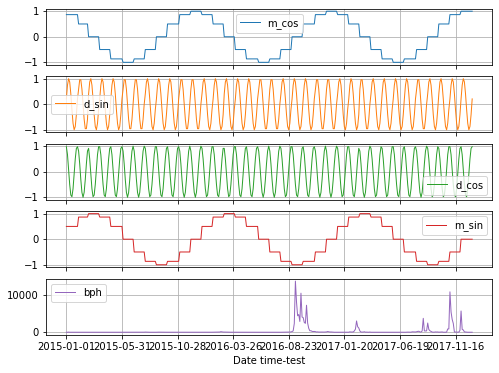

In [25]:
def plot_data(frames_train,df_name):
    #ตรวจสอบข้อมูล dataset 
    plt.figure()
    df_plot = frames_train
    df_plot.plot(lw=1,grid=True,subplots=True)
    plt.xlabel('Date time-'+ df_name)
    plt.legend()
    # plt.show()

plot_data(frames_train,'test')

values_train = frames_train.values    
n_features = frames_train.shape[1]

values_validation = frames_val.values
values_predict = frames_test.values

df = frames_test.reset_index()
date_time_predict = pd.to_datetime(df.pop('date'))

In [24]:
day_of_month = frames_train['day'].values
month_of_year = frames_train['month'].values

frames_train['d_sin'] = np.sin((2*np.pi)/30*day_of_month)
frames_train['d_cos'] = np.cos((2*np.pi)/30*day_of_month)
frames_train['m_sin'] = np.sin((2*np.pi)/12*month_of_year)
frames_train['m_cos'] = np.cos((2*np.pi)/12*month_of_year)

frames_train =frames_train.drop(['day', 'month'], axis=1)

#define function to swap columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

#swap points and rebounds columns
frames_train = swap_columns(frames_train, 'bph', list(frames_train.columns)[-1])

KeyError: 'day'

In [21]:
list(frames_train.columns)[-1]

'm_cos'

<Figure size 576x432 with 0 Axes>

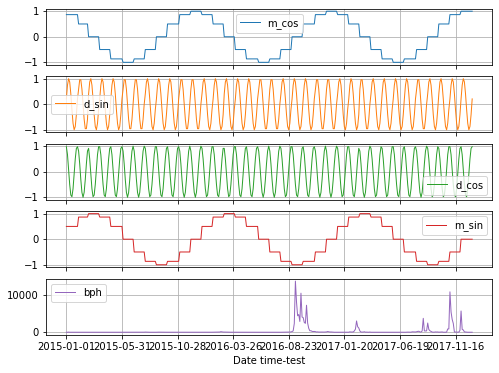

In [23]:
plot_data(frames_train,'test')

In [ ]:
day_of_month = c(1:31, 1:28, 1:30)
day_of_year <- 1:length(day_of_month)
s = sin((2*pi)/30*day_of_month)
c = cos((2*pi)/30*day_of_month)
# plot(day_of_month ~ day_of_year)
# lines(15*s+15 ~ day_of_year, col='blue')
# lines(15*c+15 ~ day_of_year, col='red')
# legend(10, 30, c('raw', 'sin', 'cos'), c('black', 'blue', 'red'))

In [ ]:
# split a univariate sequence into samples
from numpy import array
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

In [ ]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)


day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [ ]:
def series_to_supervised(data,n_in,n_out):	
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
			cols.append(df.shift(i))
			names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	for i in range(0, n_out):
			cols.append(df.shift(-i))
			if i == 0:
				names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
			else:
				names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	agg = concat(cols, axis=1)
	agg.columns = names
	agg.dropna(inplace=True)
	
	return agg

In [ ]:
n_steps = 3
n_out = 1
data_train = frames_train.iloc[:10]
reframed = series_to_supervised(data_train,n_steps,n_out)

In [ ]:
reframed

In [ ]:
# datasets
values = reframed.values
n_features = 1
#input 
n_obs = n_steps 
dataset_X, dataset_y = values[:, :n_obs], values[:, -1]
print('sample:',dataset_X.shape,'n_input:', len(dataset_X),'n_output:', dataset_y.shape) 

# reshape input to be 3D [samples, timesteps, features]
dataset_X = dataset_X.reshape((dataset_X.shape[0], n_steps, n_features))
print(dataset_X.shape, dataset_y.shape)

In [ ]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = dataset_X
y = dataset_y
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=1)

In [ ]:
# demonstrate prediction
# x_input = array([29.8 ,30.6, 31. , 30.8, 31.5, 31.9 ,32.4])
# x_input = x_input.reshape((1, n_steps, n_features))
# x_input

In [ ]:
data_predict = frames_val.iloc[:]
reframed_predict = series_to_supervised(data_predict,n_steps,n_out)
# datasets
values_predict = reframed_predict.values
n_features = 1


In [ ]:
#input 
n_obs = n_steps 
dataset_Xp, dataset_yp = values_predict[:, :n_obs], values_predict[:, -1]
print('sample:',dataset_Xp.shape,'n_input:', len(dataset_Xp),'n_output:', dataset_yp.shape) 

# reshape input to be 3D [samples, timesteps, features]
dataset_Xp = dataset_Xp.reshape((dataset_Xp.shape[0], n_steps, n_features))
print(dataset_Xp.shape, dataset_yp.shape)

In [ ]:
x_input = dataset_Xp
yhat = model.predict(x_input, verbose=0)
# print(yhat)
out = yhat.tolist()
len(out)

In [ ]:
# del model

In [ ]:
df_1 = pd.DataFrame(dataset_yp, columns = ['Column_A'])
df_2 = pd.DataFrame(out, columns = ['Column_B'])
df_1['Column_B']=df_2

In [ ]:

df_1.plot(lw=1,grid=True,figsize=(35,10),subplots=False,marker='.')
plt.xlabel('Date time')
plt.legend()
plt.show()

In [ ]:
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

In [ ]:
in_seq1

In [ ]:
in_seq2

In [ ]:
out_seq